# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    

    if city not in cities:
        cities.append(city)


len(cities)

656

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

print('Beginning Data Retrieval')
print('----------------------------')
for city in cities:
    

    response_json = requests.get(query_url + city).json()
    

    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    

    except:
        
        print("City not found. Skipping...")

Beginning Data Retrieval
----------------------------
City Name: rikitea, City ID: 4030556
City Name: palmer, City ID: 4946620
City Name: saldanha, City ID: 3361934
City Name: castro, City ID: 3466704
City Name: cabo san lucas, City ID: 3985710
City Name: nikolskoye, City ID: 546105
City Name: anda, City ID: 2038650
City Name: luderitz, City ID: 3355672
City Name: togur, City ID: 1489499
City Name: vaini, City ID: 4032243
City Name: port lincoln, City ID: 2063036
City Name: kaitangata, City ID: 2208248
City not found. Skipping...
City not found. Skipping...
City Name: dudinka, City ID: 1507116
City Name: korla, City ID: 1529376
City Name: litovko, City ID: 2020738
City Name: leningradskiy, City ID: 2123814
City Name: jamestown, City ID: 5122534
City Name: ketchikan, City ID: 5554428
City Name: sola, City ID: 2134814
City Name: albany, City ID: 5106841
City Name: hermanus, City ID: 3366880
City Name: carnarvon, City ID: 2074865
City Name: nisia floresta, City ID: 3393922
City Name: road

City Name: limbang, City ID: 1737714
City Name: pinyug, City ID: 509451
City Name: pangai, City ID: 4032369
City Name: gondanglegi, City ID: 1640660
City Name: kajaani, City ID: 654899
City Name: cherskiy, City ID: 2126199
City Name: yen bai, City ID: 1560349
City Name: talnakh, City ID: 1490256
City Name: adrar, City ID: 2381972
City Name: porto velho, City ID: 3662762
City Name: solnechnyy, City ID: 2016307
City Name: san juan, City ID: 3837213
City Name: victoria, City ID: 1819729
City Name: ust-tarka, City ID: 1488074
City Name: grindavik, City ID: 3416888
City Name: tarauaca, City ID: 3661980
City Name: suluq, City ID: 81604
City Name: saskylakh, City ID: 2017155
City Name: los llanos de aridane, City ID: 2514651
City Name: numata, City ID: 1854905
City Name: haines junction, City ID: 5969025
City Name: myaundzha, City ID: 2123100
City Name: biak, City ID: 1637001
City Name: longyearbyen, City ID: 2729907
City Name: alice springs, City ID: 2077895
City Name: talcahuano, City ID: 3

City Name: tasiilaq, City ID: 3424607
City Name: castro verde, City ID: 2269494
City Name: springbok, City ID: 3361142
City Name: olinda, City ID: 3393536
City Name: liwale, City ID: 155921
City Name: bathsheba, City ID: 3374083
City Name: arraial do cabo, City ID: 3471451
City Name: saint-georges, City ID: 3579925
City Name: taksimo, City ID: 2015701
City Name: mbanza-ngungu, City ID: 2312888
City Name: raga, City ID: 368246
City Name: jalu, City ID: 86049
City Name: ilulissat, City ID: 3423146
City Name: nsanje, City ID: 924572
City not found. Skipping...
City Name: kavieng, City ID: 2094342
City Name: mugla, City ID: 304183
City Name: huron, City ID: 5158275
City Name: drumheller, City ID: 5942798
City Name: muli, City ID: 1337617
City Name: jiamusi, City ID: 2036581
City Name: harper, City ID: 2276492
City Name: strezhevoy, City ID: 1490796
City not found. Skipping...
City Name: ternate, City ID: 1624041
City Name: quimper, City ID: 2984701
City Name: davenport, City ID: 4853423
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,4030556,Rikitea,PF,-23.1203,-134.9692,73.36,71,10,10.56
1,4946620,Palmer,US,42.1584,-72.3287,72.43,55,40,1.01
2,3361934,Saldanha,ZA,-33.0117,17.9442,60.85,91,100,8.93
3,3466704,Castro,BR,-24.7911,-50.0119,63.82,80,100,6.51
4,3985710,Cabo San Lucas,MX,22.8909,-109.9124,84.18,76,1,1.99


In [16]:
cities_df.to_csv("cities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

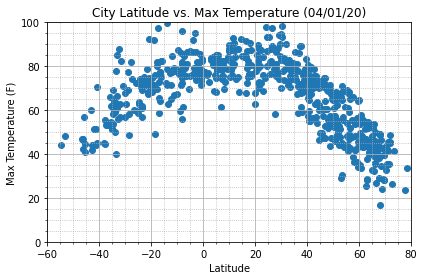

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig1.png")

## Latitude vs. Humidity Plot

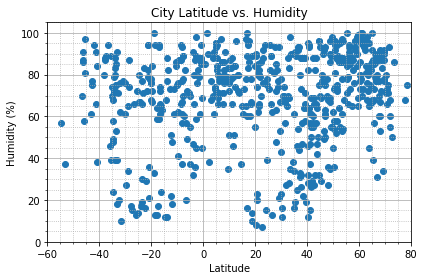

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig2.png")

## Latitude vs. Cloudiness Plot

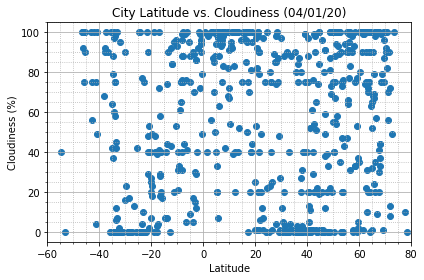

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig3.png")

## Latitude vs. Wind Speed Plot

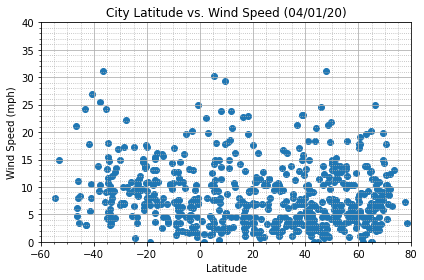

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig4.png")

## Linear Regression

In [22]:
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

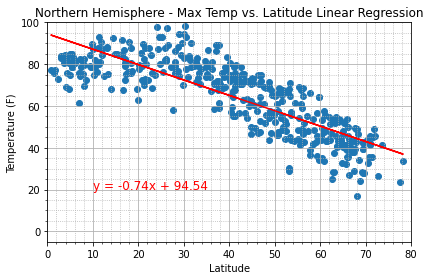

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

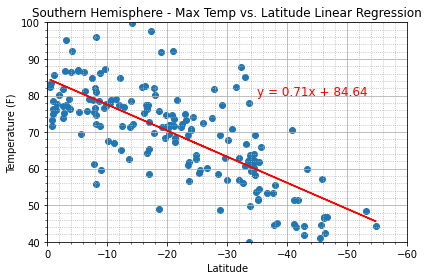

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

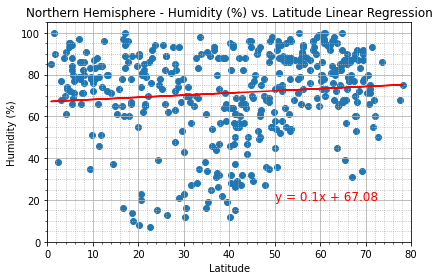

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

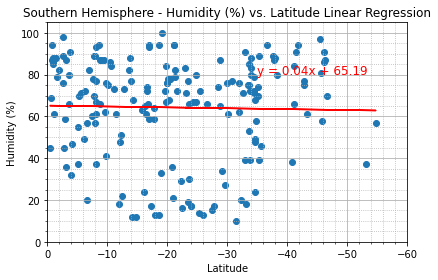

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

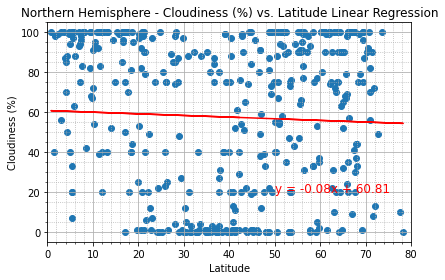

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
x_values = northern_hemisphere["Lat"]
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

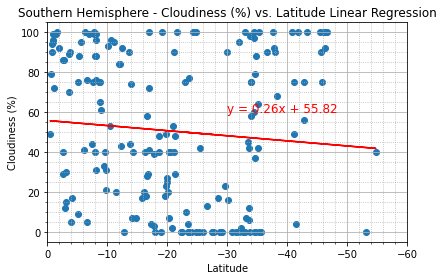

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig10.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

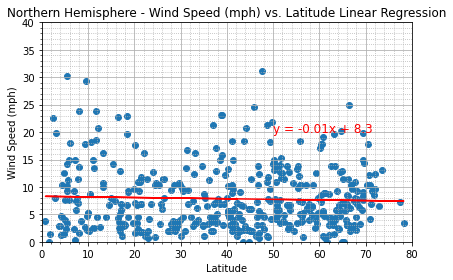

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

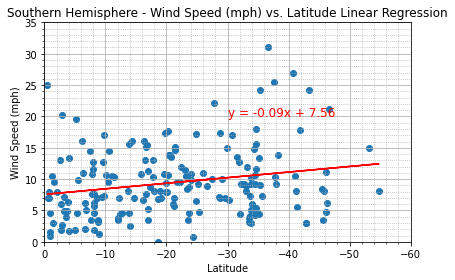

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Fig12.png")